# MSDS692 Project: Car Accidents in Denver, CO (2014-2018)
# Data Merge and Linear Regression for Monthly Data
## Natalia Weakly 
### Monthly data 

In [1]:
# Imports
import pandas as pd
import numpy as np
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Load Main Car Accident Data

In [2]:
# load data
monthly_accidents = pd.read_csv('../MSDSProject/monthlyaccidents.csv', names=['year', 'month', 'numberOfAccidents'])

In [3]:
#check data
monthly_accidents.head()

,year,month,numberOfAccidents
0,Year,Month,Number Of Accidents
1,2014,1,1897
2,2014,2,1683
3,2014,3,1719
4,2014,4,1720


In [4]:
# drop the first row (former header)
monthly_accidents=monthly_accidents.iloc[1:]
# add a 'day' column with day=1
monthly_accidents['day']='1'

In [5]:
# create a column for a full date
monthly_accidents['date']=pd.to_datetime(monthly_accidents[['year', 'month', 'day']])
# drop old separate columns for year, month and date
monthly_accidents.drop(['year', 'month', 'day'], axis=1, inplace=True)

In [6]:
# convert the number of accidents to numeric
monthly_accidents['numberOfAccidents'] = pd.to_numeric(monthly_accidents['numberOfAccidents'], errors='coerce')

In [7]:
# Reset the index
monthly_accidents =monthly_accidents.reset_index(drop=True)

In [8]:
# Check results
monthly_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
numberOfAccidents    62 non-null int64
date                 62 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.0 KB


In [9]:
monthly_accidents.head()

,numberOfAccidents,date
0,1897,2014-01-01
1,1683,2014-02-01
2,1719,2014-03-01
3,1720,2014-04-01
4,1792,2014-05-01


In [10]:
# delete records for January 2019 and February 2019 as this data is incomplete
monthly_accidents=monthly_accidents.iloc[:-2]

In [11]:
# check results
monthly_accidents

,numberOfAccidents,date
0,1897,2014-01-01
1,1683,2014-02-01
2,1719,2014-03-01
3,1720,2014-04-01
4,1792,2014-05-01
5,1848,2014-06-01
6,1895,2014-07-01
7,1932,2014-08-01
8,2030,2014-09-01
9,2113,2014-10-01


# Load and merge additional data
### Labor force statistics (as proxy for population changes)

In [12]:
#Load Labor Force Data
laborForce=pd.read_csv('laborForceMetro.csv', index_col=0)

In [13]:
laborForce['date']=pd.to_datetime(laborForce['date'])

In [14]:
laborForce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 7 columns):
date                   60 non-null datetime64[ns]
labor force_Denver     60 non-null int64
employment_Denver      60 non-null int64
labor force_Boulder    60 non-null int64
employment_Boulder     60 non-null int64
totalLaborForce        60 non-null int64
totalEmployment        60 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 3.8 KB



Since we previously established that labor force and employment statistics in Denver and Boulder are highly correlated, in order to eliminate collinearity on our future regression model, we will use only the totalLaborForce column.


In [15]:
# drop unwanted columns
laborForce.drop(['labor force_Denver', 'employment_Denver', 'labor force_Boulder', 'employment_Boulder', 'totalEmployment'], axis=1, inplace=True)

In [16]:
# check results
laborForce.head()

,date,totalLaborForce
0,2014-01-01,1639683
1,2014-02-01,1647867
2,2014-03-01,1648057
3,2014-04-01,1654867
4,2014-05-01,1659801


In [17]:
laborForce.tail()

,date,totalLaborForce
55,2018-08-01,1839724
56,2018-09-01,1837430
57,2018-10-01,1845939
58,2018-11-01,1844113
59,2018-12-01,1843489


In [18]:
# merge accidents and labor force data
monthly_accidents_merged = monthly_accidents.merge(laborForce, left_on='date', right_on='date')

In [19]:
# check results
monthly_accidents_merged.head()

,numberOfAccidents,date,totalLaborForce
0,1897,2014-01-01,1639683
1,1683,2014-02-01,1647867
2,1719,2014-03-01,1648057
3,1720,2014-04-01,1654867
4,1792,2014-05-01,1659801


In [20]:
monthly_accidents_merged.tail()

,numberOfAccidents,date,totalLaborForce
55,2146,2018-08-01,1839724
56,2203,2018-09-01,1837430
57,2270,2018-10-01,1845939
58,2076,2018-11-01,1844113
59,1918,2018-12-01,1843489


## Alcohol Sales (CO)

In [21]:
# Load monthly alcohol Sales data
alcoholSales=pd.read_csv('alcoholSalesCO.csv', index_col=0)

In [22]:
# convert 'date' to datetime format
alcoholSales['date']=pd.to_datetime(alcoholSales['date'])

In [23]:
#check results
alcoholSales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 7 columns):
date                  60 non-null datetime64[ns]
3.2%_beer             60 non-null int64
repeal_beer           60 non-null int64
spiritious_liquors    60 non-null int64
hard_cider            60 non-null int64
wine                  60 non-null int64
all_alcohol_sales     60 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 3.8 KB



At the data preprocessing and EDA stage, we established that repeal beer shows the highest correlation with the total alcohol sales,
the rest of the types of alcohol showed mixed results. So, we will eliminate the total alcohol sales (96.7% correlated with beer sales) from the analysis and keep all other columns showing sales by alcohol type.


In [24]:
# drop total alcohol sales
alcoholSales.drop('all_alcohol_sales', axis=1, inplace=True)

In [25]:
# check results
alcoholSales.head()

,date,3.2%_beer,repeal_beer,spiritious_liquors,hard_cider,wine
0,2014-01-01,379023,8285825,745256,49114,1271371
1,2014-02-01,297695,7986097,815728,29505,1178519
2,2014-03-01,212979,5266684,891014,21671,1896136
3,2014-04-01,432639,11800227,965511,57169,1022223
4,2014-05-01,346903,8645076,1006886,48052,1594599


In [26]:
alcoholSales.tail()

,date,3.2%_beer,repeal_beer,spiritious_liquors,hard_cider,wine
55,2018-08-01,455192,11964801,1265508,129143,1821044
56,2018-09-01,357540,9542416,1049497,109686,1348294
57,2018-10-01,357198,9038194,1204850,106255,1662984
58,2018-11-01,357198,9038194,1204850,106255,1662984
59,2018-12-01,357198,9038194,1204850,106255,1662984


In [27]:
# merge alcohol sales data with the accidents and labor force data
monthly_accidents_merged2 = monthly_accidents_merged.merge(alcoholSales, left_on='date', right_on='date')

In [28]:
# check merge results
monthly_accidents_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 8 columns):
numberOfAccidents     60 non-null int64
date                  60 non-null datetime64[ns]
totalLaborForce       60 non-null int64
3.2%_beer             60 non-null int64
repeal_beer           60 non-null int64
spiritious_liquors    60 non-null int64
hard_cider            60 non-null int64
wine                  60 non-null int64
dtypes: datetime64[ns](1), int64(7)
memory usage: 4.2 KB


## Marijuana Sales, CO

In [29]:
# Load Marijuana sales data
marijuanaSales=pd.read_csv('marijuanaSalesCO.csv', index_col=0)

In [30]:
# format 'date' as datetime
marijuanaSales['date']=pd.to_datetime(marijuanaSales['date'])


Since we previously established that retail recreational marijuana sales are almost 99% correlated with the total marijuana sales, we are going to drop the total sales column. 


In [31]:
#drop the total sales column
marijuanaSales.drop('total_monthly', axis=1, inplace=True)

In [32]:
#check results
marijuanaSales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 3 columns):
date               60 non-null datetime64[ns]
medical_monthly    60 non-null float64
retail_monthly     60 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.9 KB


In [33]:
marijuanaSales.head()

,date,medical_monthly,retail_monthly
0,2014-01-01,32541720.0,14022213.0
1,2014-02-01,31738572.0,14248473.0
2,2014-03-01,34821878.0,19881631.0
3,2014-04-01,32686869.0,20765986.0
4,2014-05-01,31355208.0,21375001.0


In [34]:
marijuanaSales.tail()

,date,medical_monthly,retail_monthly
55,2018-08-01,28323863.0,112998245.0
56,2018-09-01,27897573.0,107638880.0
57,2018-10-01,27919377.0,101305394.0
58,2018-11-01,26062807.0,97877084.0
59,2018-12-01,26062807.0,97877084.0


In [35]:
# Merge marijuana sales data with the rest of the data set
monthly_accidents_merged3 = monthly_accidents_merged2.merge(marijuanaSales, left_on='date', right_on='date')

In [36]:
# Check results
monthly_accidents_merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 10 columns):
numberOfAccidents     60 non-null int64
date                  60 non-null datetime64[ns]
totalLaborForce       60 non-null int64
3.2%_beer             60 non-null int64
repeal_beer           60 non-null int64
spiritious_liquors    60 non-null int64
hard_cider            60 non-null int64
wine                  60 non-null int64
medical_monthly       60 non-null float64
retail_monthly        60 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 5.2 KB


In [37]:
# Look at the resulting dataframe
monthly_accidents_merged3

,numberOfAccidents,date,totalLaborForce,3.2%_beer,repeal_beer,spiritious_liquors,hard_cider,wine,medical_monthly,retail_monthly
0,1897,2014-01-01,1639683,379023,8285825,745256,49114,1271371,32541720.0,14022213.0
1,1683,2014-02-01,1647867,297695,7986097,815728,29505,1178519,31738572.0,14248473.0
2,1719,2014-03-01,1648057,212979,5266684,891014,21671,1896136,34821878.0,19881631.0
3,1720,2014-04-01,1654867,432639,11800227,965511,57169,1022223,32686869.0,20765986.0
4,1792,2014-05-01,1659801,346903,8645076,1006886,48052,1594599,31355208.0,21375001.0
5,1848,2014-06-01,1670592,437706,9091681,1198876,59636,1337679,29950309.0,23978082.0
6,1895,2014-07-01,1673870,484321,10828375,904332,66905,1424128,31137623.0,29866792.0
7,1932,2014-08-01,1669831,452079,10201298,928932,71118,1406946,33912226.0,33520608.0
8,2030,2014-09-01,1670505,415127,9392870,938769,80414,1339836,32721238.0,30345357.0
9,2113,2014-10-01,1681078,380558,9155223,1011479,95887,1512008,31779216.0,31185985.0


In [38]:
# for the modeling purposes exlude the 'date' column 
monthly_accidents_merged3.drop('date', axis=1, inplace=True)

In [39]:
# Check results
monthly_accidents_merged3

,numberOfAccidents,totalLaborForce,3.2%_beer,repeal_beer,spiritious_liquors,hard_cider,wine,medical_monthly,retail_monthly
0,1897,1639683,379023,8285825,745256,49114,1271371,32541720.0,14022213.0
1,1683,1647867,297695,7986097,815728,29505,1178519,31738572.0,14248473.0
2,1719,1648057,212979,5266684,891014,21671,1896136,34821878.0,19881631.0
3,1720,1654867,432639,11800227,965511,57169,1022223,32686869.0,20765986.0
4,1792,1659801,346903,8645076,1006886,48052,1594599,31355208.0,21375001.0
5,1848,1670592,437706,9091681,1198876,59636,1337679,29950309.0,23978082.0
6,1895,1673870,484321,10828375,904332,66905,1424128,31137623.0,29866792.0
7,1932,1669831,452079,10201298,928932,71118,1406946,33912226.0,33520608.0
8,2030,1670505,415127,9392870,938769,80414,1339836,32721238.0,30345357.0
9,2113,1681078,380558,9155223,1011479,95887,1512008,31779216.0,31185985.0


In [40]:
# Summary statistics for all variables
monthly_accidents_merged3.describe()

,numberOfAccidents,totalLaborForce,3.2%_beer,repeal_beer,spiritious_liquors,hard_cider,wine,medical_monthly,retail_monthly
count,60.000000,6.000000e+01,60.000000,6.000000e+01,6.000000e+01,60.000000,6.000000e+01,6.000000e+01,6.000000e+01
mean,2000.933333,1.735026e+06,367725.266667,9.225276e+06,1.068513e+06,97822.266667,1.502114e+06,3.315769e+07,6.732410e+07
std,146.214709,6.505425e+04,65274.410757,1.361939e+06,2.061369e+05,28782.720063,2.307271e+05,4.217982e+06,2.906198e+07
min,1683.000000,1.639683e+06,212979.000000,5.266684e+06,6.801190e+05,21671.000000,1.022223e+06,2.606281e+07,1.402221e+07
25%,1903.250000,1.679276e+06,322385.750000,8.619056e+06,9.375300e+05,80321.750000,1.361230e+06,2.977856e+07,4.361286e+07
50%,1996.500000,1.730092e+06,357198.000000,9.038194e+06,1.038128e+06,99497.500000,1.460927e+06,3.284055e+07,7.113238e+07
75%,2103.250000,1.794106e+06,417541.250000,9.956057e+06,1.198731e+06,117761.500000,1.639754e+06,3.622466e+07,9.309009e+07
max,2272.000000,1.850662e+06,487252.000000,1.198846e+07,1.572105e+06,158037.000000,2.084373e+06,4.105695e+07,1.129982e+08


# Linear Regression

Use linear regression to find relationships between the variables

Linear regression assumptions:
 - a linear relationship between the predictors and the dependent variables
 - no multicollinearity  - we eliminated highly correlated predictor variables 

So, let's check for linearity by looking at pairwise scatter plots.


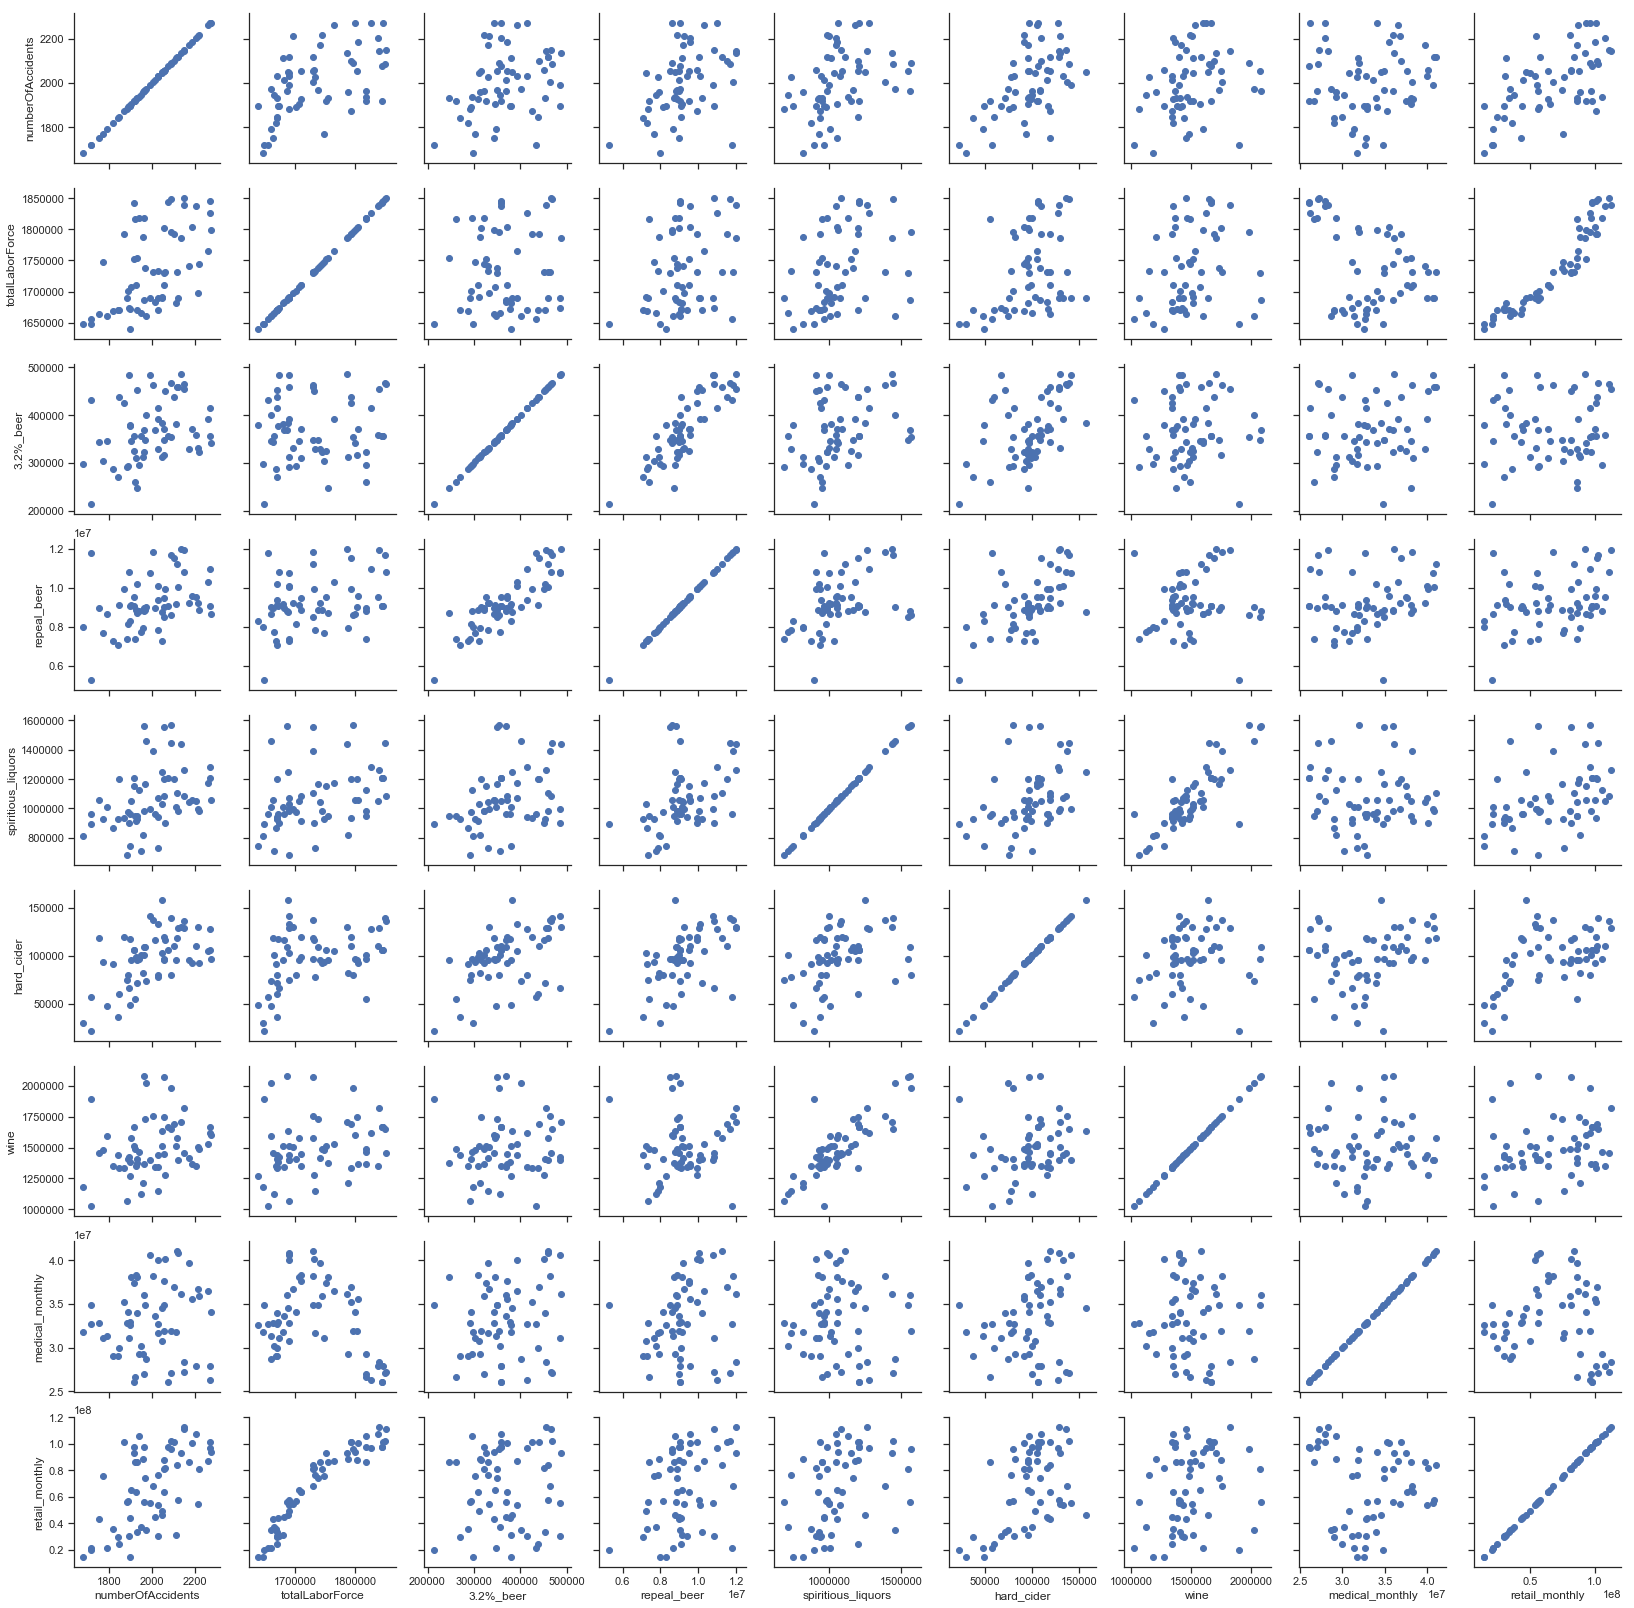

In [41]:
# pairwise scatter plots
sns.set(style='ticks', color_codes=True)
g=sns.PairGrid(monthly_accidents_merged3)
g.map(plt.scatter);


The above plots suggest that there are potentially strong linear relationships between the number of accident and the totalLaborForce, and number of accidents and retail_monthly (monthly marijuana sales), and potentially regular strength beer.


## Multiple Linear Regression Model 

In [42]:
# Linear regresion using statsmodels
#ols - ordinary least squares

#Let's start by building a model using the three independent variables 
import statsmodels.formula.api as smf

In [43]:
# rename a column to satisfy requrements of the statsmodels package
monthly_accidents_merged3.rename(columns={'3.2%_beer': 'beer32'}, inplace=True)
# Convert int data type top float for the regression to work properly
monthly_accidents_merged3['totalLaborForce']=monthly_accidents_merged3['totalLaborForce'].astype('float64')
monthly_accidents_merged3['repeal_beer'] = monthly_accidents_merged3['repeal_beer'].astype('float64')
monthly_accidents_merged3['beer32'] = monthly_accidents_merged3['beer32'].astype('float64')
monthly_accidents_merged3['spiritious_liquors']= monthly_accidents_merged3['spiritious_liquors'].astype('float64')
monthly_accidents_merged3['hard_cider'] = monthly_accidents_merged3['hard_cider'].astype('float64')
monthly_accidents_merged3['wine'] = monthly_accidents_merged3['wine'].astype('float64')
monthly_accidents_merged3['numberOfAccidents'] = pd.to_numeric(monthly_accidents_merged3['numberOfAccidents'], errors='coerce').astype('float64')

In [44]:
# Build a model
model=smf.ols(formula="numberOfAccidents ~ totalLaborForce + repeal_beer + retail_monthly", data = monthly_accidents_merged3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      numberOfAccidents   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     12.63
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           2.05e-06
Time:                        21:07:36   Log-Likelihood:                -368.23
No. Observations:                  60   AIC:                             744.5
Df Residuals:                      56   BIC:                             752.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1946.4619   1103.993      1.763      0.083    -265.103    4158.027
totalLaborForce    -0.0002      0.001     -0.316      0.753      -0.002       0.001
repeal_beer       2.43e-05   1.18e-05      2.066      0.043    7.42e-07    4.79e-05
retail_monthly   3.082e-06   1.56e-06      1.980      0.053   -3.56e-08     6.2e-06
==============================================================================
Omnibus:                        0.318   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.853   Jarque-Bera (JB):                0.492
Skew:                           0.119   Prob(JB):                        0.782
Kurtosis:                       2.626   Cond. No.                     5.44e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Diagnostic - Check Model Assumptions

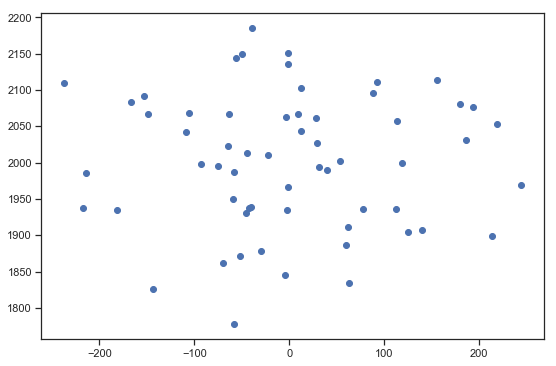

In [45]:
#Equal variance (homoscedasticity) of the residuals
predicted_values = model.fittedvalues.copy()
true_values = monthly_accidents_merged3['numberOfAccidents'].values.copy()
residuals=true_values - predicted_values
fig, ax = plt.subplots(figsize=(9, 6)) 
_ = ax.scatter(residuals, predicted_values)

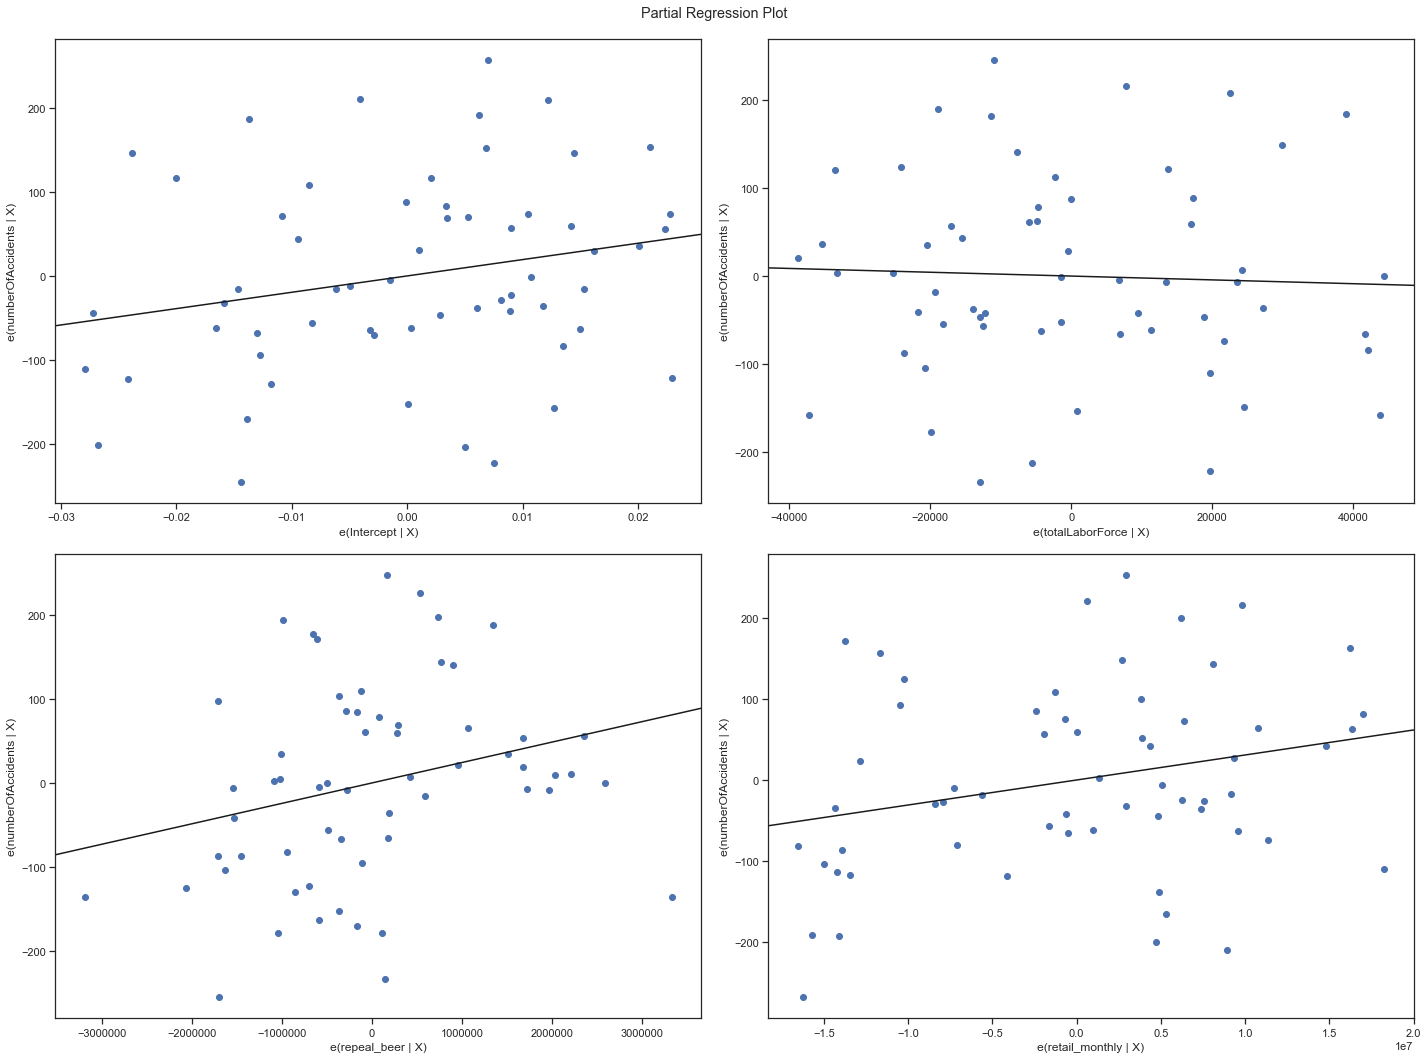

In [46]:
# Partial regression plots
import statsmodels.api as sm
fig =plt.figure(figsize=(20, 15))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

0.9871158846316734

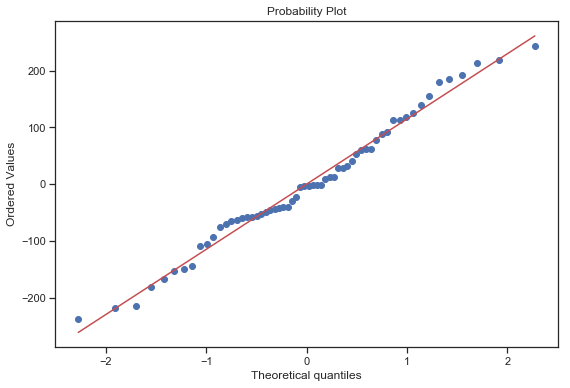

In [47]:
# Normal distribution of the residuals - Check Q-Q plot
import scipy as sp
fig, ax = plt.subplots(figsize=(9, 6))
_, (__, ___, r) = sp.stats.probplot(residuals, plot=ax, fit=True)
r**2



Requirements of homoscedasticity and normality of the residuals seem to be satisfied.


## Comparing Mutiple Models 

Are there any alternative multiple linear models that show better results?


In [48]:
#Fit linear models
accidents1 = smf.ols(formula="numberOfAccidents ~ retail_monthly", data = monthly_accidents_merged3).fit()
accidents2 = smf.ols(formula="numberOfAccidents ~ repeal_beer", data = monthly_accidents_merged3).fit()
accidents3 = smf.ols(formula="numberOfAccidents ~ repeal_beer + retail_monthly", data = monthly_accidents_merged3).fit()
accidents4 = smf.ols(formula="numberOfAccidents ~ totalLaborForce + repeal_beer + retail_monthly", data = monthly_accidents_merged3).fit()
accidents5 = smf.ols(formula="numberOfAccidents ~ totalLaborForce + repeal_beer + retail_monthly + spiritious_liquors", data = monthly_accidents_merged3).fit()
accidents6 = smf.ols(formula="numberOfAccidents ~ totalLaborForce + repeal_beer + retail_monthly + spiritious_liquors + beer32", data = monthly_accidents_merged3).fit()
accidents7 = smf.ols(formula="numberOfAccidents ~ totalLaborForce + repeal_beer + retail_monthly + spiritious_liquors + beer32 + hard_cider", data = monthly_accidents_merged3).fit()
accidents8 = smf.ols(formula="numberOfAccidents ~ totalLaborForce + repeal_beer + retail_monthly + spiritious_liquors + beer32 + hard_cider + wine", data = monthly_accidents_merged3).fit()
accidents8 = smf.ols(formula="numberOfAccidents ~ totalLaborForce + repeal_beer + retail_monthly + spiritious_liquors + beer32 + hard_cider + wine +medical_monthly", data = monthly_accidents_merged3).fit()


In [49]:
# Collect coefficients for the models
models_results = pd.concat([accidents1.params, accidents2.params, accidents3.params, accidents3.params, accidents5.params, accidents6.params, accidents7.params, accidents8.params], axis=1).\
rename(columns=lambda x: 'accidents'+ str(x+1)).reset_index().rename(columns={'index': 'param'}).melt(id_vars='param', var_name='model', value_name='estimate')

C:\Users\RodneyWeakly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [50]:
# Display coefficients for all models
models_results

,param,model,estimate
0,Intercept,accidents1,1.798681e+03
1,beer32,accidents1,NaN
2,hard_cider,accidents1,NaN
3,medical_monthly,accidents1,NaN
4,repeal_beer,accidents1,NaN
5,retail_monthly,accidents1,3.004152e-06
6,spiritious_liquors,accidents1,NaN
7,totalLaborForce,accidents1,NaN
8,wine,accidents1,NaN
9,Intercept,accidents2,1.603411e+03


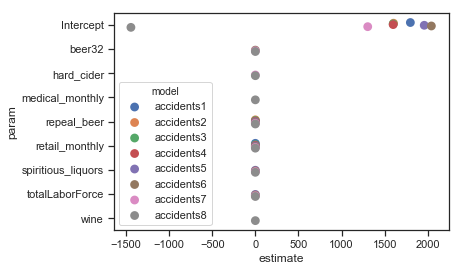

In [54]:
# Visualize parameters for the models
fig, ax = plt.subplots()
ax = sns.pointplot(x="estimate", y="param", hue="model" , data=models_results, dodge=True, join = False) #dodge=True to jitter the points, join=False - do not connect the points
plt.show()

In [56]:
# Use ANOVA to compare the models
import statsmodels
model_names = ['accidents1', 'accidents2', 'accidents3', 'accidents4', 'accidents5', 'accidents6', 'accidents7', 'accidents8']
accidents_anova = statsmodels.stats.anova.anova_lm(accidents1, accidents2, accidents3, accidents4, accidents5, accidents6, accidents7, accidents8)
accidents_anova.index = model_names
accidents_anova

C:\Users\RodneyWeakly\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\RodneyWeakly\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\RodneyWeakly\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
accidents1,58.0,8.116213e+05,0.0,NaN,NaN,NaN
accidents2,58.0,1.058142e+06,-0.0,-246520.774326,inf,NaN
accidents3,57.0,7.536856e+05,1.0,304456.484481,24.641913,0.000007
accidents4,56.0,7.523447e+05,1.0,1340.910827,0.108530,0.743053
accidents5,55.0,7.412851e+05,1.0,11059.596246,0.895135,0.348228
accidents6,54.0,7.027958e+05,1.0,38489.339987,3.115227,0.083218
accidents7,53.0,6.649422e+05,1.0,37853.599414,3.063771,0.085843
accidents8,51.0,6.301167e+05,2.0,34825.455367,1.409341,0.253657


In [58]:
#Use Akaike information criterion (AIC) and Bayesian Information Criterion (BIC) to compare the models
accidents_models = [accidents1, accidents2, accidents3, accidents4, accidents5, accidents6, accidents7, accidents8]

accidents_aic = list(map(statsmodels.regression.linear_model.RegressionResults.aic, accidents_models))
accidents_bic = list(map(statsmodels.regression.linear_model.RegressionResults.bic, accidents_models))
AkaikeAndBayesianIC = pd.DataFrame({'model': model_names, 'aic': accidents_aic, 'bic': accidents_bic})
AkaikeAndBayesianIC

,model,aic,bic
0,accidents1,745.019299,749.207988
1,accidents2,760.933461,765.122150
2,accidents3,742.575786,748.858819
3,accidents4,744.468942,752.846320
4,accidents5,745.580385,756.052108
5,accidents6,744.381246,756.947313
6,accidents7,743.059270,757.719682
7,accidents8,743.831570,762.680671



The above results show that the model accidents3 has the lower Akaike information criterion (AIC = 741.575786) and Bayesian information criterion (BIC = 748.858819), which means better performance on our dataset. Accidents3 model includes only 2 independent variables - monthly sales of full-strength beer and monthly sales of recreational marijuana in the State of Colorado.


In [59]:
#Summary of the best model
accidents3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      numberOfAccidents   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     19.20
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           4.23e-07
Time:                        21:21:32   Log-Likelihood:                -368.29
No. Observations:                  60   AIC:                             742.6
Df Residuals:                      57   BIC:                             748.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1599.2119    102.488     15.604      0.000    1393.983    1804.441
repeal_beer     2.441e-05   1.17e-05      2.093      0.041    1.06e-06    4.78e-05
retail_monthly  2.622e-06   5.46e-07      4.798      0.000    1.53e-06    3.72e-06
==============================================================================
Omnibus:                        0.360   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.835   Jarque-Bera (JB):                0.533
Skew:                           0.110   Prob(JB):                        0.766
Kurtosis:                       2.594   Cond. No.                     5.09e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


### Conclusions:

According to the model, with all other factors held constant, an increase in 100000 gallons of monthly beer sales in Colorado is connected to 2.4 additional car accidents in Denver.
Similarly, with all other factors held constant, a $100,000 increase in recreational marijuana sales in Colorado might translate into 0.2622 additional car accidents in Denver every month.
However, this model just establishes a statistical link, it does not prove causality. In addition, the model includes a very significant intercept coefficient - 1599.2119 which reflects the influence of all other factors not included in our model. It means that while there is a statistical link between alcohol and marijuana sales and the number of accidents, more research is needed to establish more reliable predictors.


#### Model Diagnostic for the Best Model

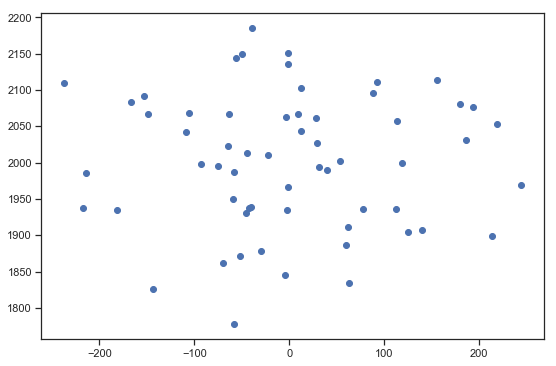

In [60]:
#Equal variance (homoscedasticity) of the residuals
predicted_values3 = accidents3.fittedvalues.copy()
true_values3 = monthly_accidents_merged3['numberOfAccidents'].values.copy()
residuals3=true_values3 - predicted_values3
fig, ax = plt.subplots(figsize=(9, 6)) 
_ = ax.scatter(residuals, predicted_values)

0.988155189450365

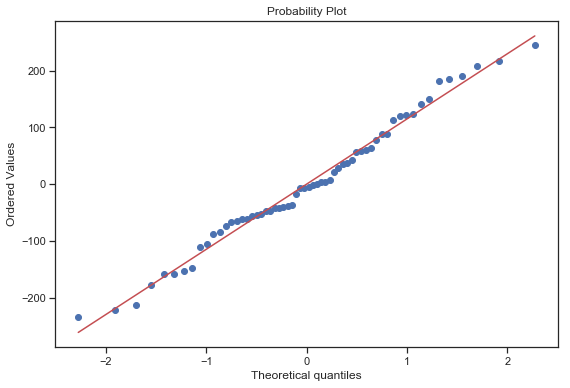

In [61]:
#Normal distribution of the residuals - Check Q-Q plot
fig, ax = plt.subplots(figsize=(9, 6))
_, (__, ___, r) = sp.stats.probplot(residuals3, plot=ax, fit=True)
r**2



Requirements of homoscedasticity and normality of the residuals seem to be satisfied for our best model.

__For comparison purposes only__ - population growth alone (as approximated by the labor force estimates for Denver and Boulder areas combined), cannot be used as a reliable predictor of the monthly number of car accidents within Denver city limits.

The model below shows worse performance than our chosen 2-factor model.


In [62]:
# Model with one independent variable - totalLaborForce
model9=smf.ols(formula='numberOfAccidents ~ totalLaborForce', data = monthly_accidents_merged3)
results9 = model9.fit()
results9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      numberOfAccidents   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     25.02
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           5.57e-06
Time:                        21:32:08   Log-Likelihood:                -372.98
No. Observations:                  60   AIC:                             750.0
Df Residuals:                      58   BIC:                             754.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -139.9385    428.275     -0.327      0.745    -997.224     717.347
totalLaborForce     0.0012      0.000      5.002      0.000       0.001       0.002
==============================================================================
Omnibus:                        1.945   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.297
Skew:                          -0.038   Prob(JB):                        0.523
Kurtosis:                       2.284   Cond. No.                     4.67e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""